# 毕业论文`GRAD`
## `MCIP`气象场分析

---
*@author: Evan*\
*@date: 2023-11-10*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import rcParams
config = {
    "font.family":'Times New Roman',
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)

import sys
sys.path.append('../../../src/')
from namelist import *

# silence the warning note
import warnings
warnings.filterwarnings("ignore")

读取城市站点对应关系

In [2]:
sitelocation = pd.read_excel(obs_dir + 'sitelocation.xlsx')
site_group = sitelocation.groupby('城市')
city_site = {}
for group in site_group.groups:
    city_site[group] = site_group.get_group(group)['监测点编码'].values
city_site

{'东莞': array(['1387A', '1388A', '1389A', '1390A', '1391A', '3319A', '3626A',
        '3627A'], dtype=object),
 '中山': array(['1379A', '1380A', '1381A', '1382A', '3454A'], dtype=object),
 '佛山': array(['1371A', '1372A', '1373A', '1374A', '1375A', '1376A', '1377A',
        '1378A', '3625A'], dtype=object),
 '广州': array(['1345A', '1346A', '1347A', '1348A', '1349A', '1350A', '1351A',
        '1352A', '1353A', '1354A', '1355A', '2846A', '3298A', '3299A',
        '3300A', '3301A', '3302A', '3303A', '3304A', '3443A', '3445A',
        '3446A'], dtype=object),
 '惠州': array(['1392A', '1393A', '1394A', '1395A', '1396A', '3314A', '3452A'],
       dtype=object),
 '江门': array(['1383A', '1384A', '1385A', '1386A', '3311A', '3449A'], dtype=object),
 '深圳': array(['1356A', '1357A', '1358A', '1359A', '1360A', '1361A', '1362A',
        '1363A', '1364A', '1365A', '1366A', '3305A', '3306A', '3307A',
        '3447A', '3623A'], dtype=object),
 '珠海': array(['1367A', '1368A', '1369A', '1370A', '3308A', '3448A'], d

In [3]:
city_list_EN = ['Zhaoqing','Huizhou','Guangzhou','Foshan',
                'Dongguan','Shenzhen','Zhongshan','Jiangmen',
                'Zhuhai']
city_list_CN = ['肇庆', '惠州', '广州', '佛山',
                '东莞', '深圳', '中山', '江门',
                '珠海']
city_dict = {cn:en for cn,en in zip(city_list_CN,city_list_EN)}


In [4]:
var = 'O3'
lows = [2014, 2015, 2016,]
highs = [2019, 2021, 2022]

dict_low = {}
dict_high = {}

for city in city_list_CN:
    mean_low = []
    mean_high = []
    for year in lows:
        df = pd.read_excel(obsSep + f'site_{var}_{year}.xlsx',index_col=0)
        mean = df[city_site[city]].mean(axis=1,skipna=True).values
        mean_low.append(mean)
    dict_low[city] = np.nanmean(mean_low,axis=0)
    for year in highs:
        df = pd.read_excel(obsSep + f'site_{var}_{year}.xlsx',index_col=0)
        mean = df[city_site[city]].mean(axis=1,skipna=True).values
        mean_high.append(mean)
    dict_high[city] = np.nanmean(mean_high,axis=0)

In [5]:
df_low = pd.DataFrame(
    index=pd.date_range('2023-09-01T00','2023-09-30T23',freq='H'),
    data=dict_low,
)
df_low.rename(columns=city_dict,inplace=True)

df_high = pd.DataFrame(
    index=pd.date_range('2023-09-01T00','2023-09-30T23',freq='H'),
    data=dict_high,
)
df_high.rename(columns=city_dict,inplace=True)

df_low

,Zhaoqing,Huizhou,Guangzhou,Foshan,Dongguan,Shenzhen,Zhongshan,Jiangmen,Zhuhai
2023-09-01 00:00:00,28.166667,57.300000,20.106061,16.791667,35.000000,39.886364,25.500000,19.833333,41.375000
2023-09-01 01:00:00,18.000000,35.883333,14.841751,16.505952,23.666667,32.560606,23.916667,15.083333,35.000000
2023-09-01 02:00:00,17.111111,32.250000,14.000000,23.315476,24.516667,32.484848,24.083333,15.083333,37.250000
2023-09-01 03:00:00,12.111111,30.316667,13.643098,21.722222,25.666667,31.972727,24.305556,14.111111,35.416667
2023-09-01 04:00:00,15.555556,25.550000,15.757576,21.902778,28.400000,31.575758,27.555556,16.500000,34.583333
...,...,...,...,...,...,...,...,...,...
2023-09-30 19:00:00,106.166667,84.000000,61.827273,72.083333,75.244444,92.012121,82.277778,64.583333,103.500000
2023-09-30 20:00:00,97.777778,76.533333,49.196970,59.875000,65.133333,77.245455,68.555556,61.916667,89.250000
2023-09-30 21:00:00,85.500000,65.733333,47.151515,50.000000,59.116667,60.421212,66.111111,59.416667,81.583333
2023-09-30 22:00:00,69.555556,63.400000,45.950758,37.583333,52.950000,55.896970,51.111111,51.972222,81.555556


## 绘制热力图

热力图城市排序按照high的排序

In [6]:
thermal_low = np.array(
 np.array([df_low[city].rolling(8).mean().resample('D').max() for city in city_list_EN])
)
thermal_high = np.array(
 np.array([df_high[city].rolling(8).mean().resample('D').max() for city in city_list_EN])
)
thermal_low.shape

(9, 30)

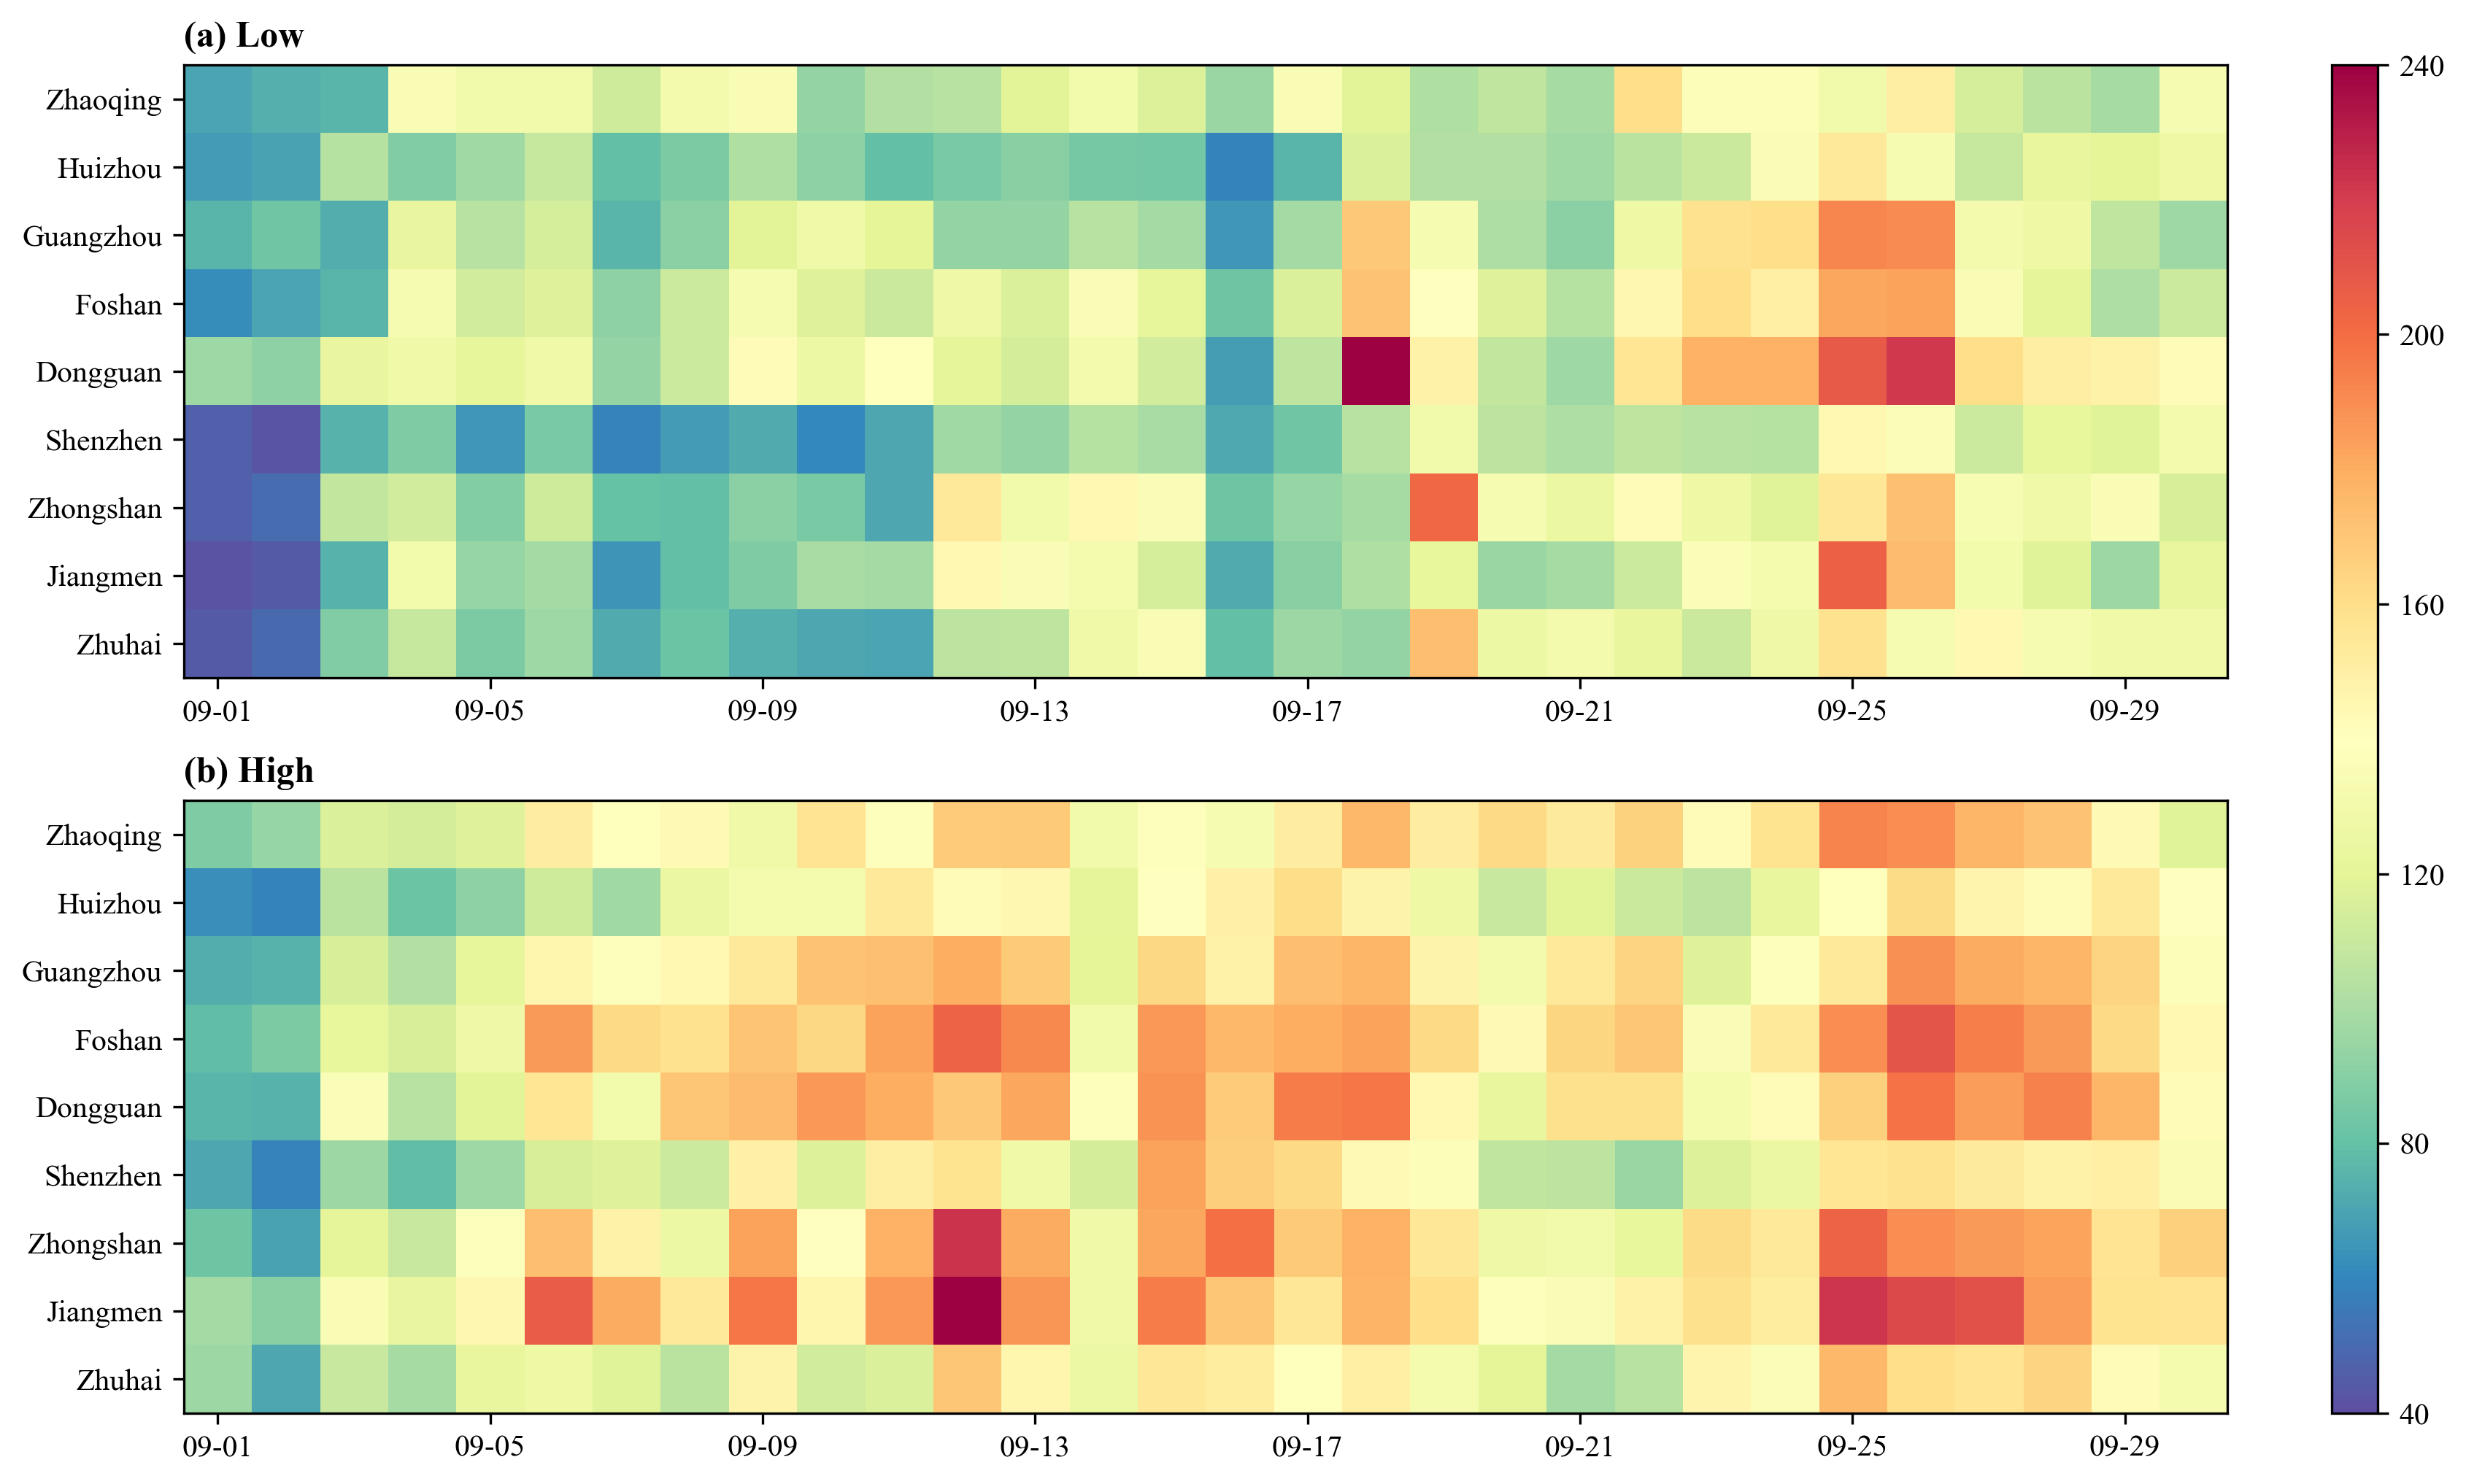

In [9]:
cmin = 40
cmax = 240

fig = plt.figure(figsize=(14, 8),dpi=300)
ax = fig.subplots(2,1)

ci = ax[0].imshow(thermal_low, vmin=cmin,vmax=cmax,cmap='Spectral_r')
ci = ax[1].imshow(thermal_high, vmin=cmin,vmax=cmax,cmap='Spectral_r')

ax[0].set_title('(a) Low', loc='left',fontdict={'fontsize':12,'fontweight':'bold'})
ax[1].set_title('(b) High', loc='left',fontdict={'fontsize':12,'fontweight':'bold'})

for ax in ax.flat:
    ax.set_xticks(np.arange(0,np.size(thermal_high,1),4))
    ax.set_xticklabels(pd.date_range('2023-09-01', '2023-09-30', freq='4D').strftime('%m-%d'))
    ax.set_yticks(np.arange(len(city_list_EN)))
    ax.set_yticklabels(city_list_EN)

fig.subplots_adjust(right=0.9,hspace=0.2)
position = fig.add_axes([0.88, 0.11, 0.015, 0.77])
cbar = fig.colorbar(ci, cax=position)
cbar.set_ticks(np.arange(cmin,cmax+.1,40))
# cbar.set_label('')
plt.show()


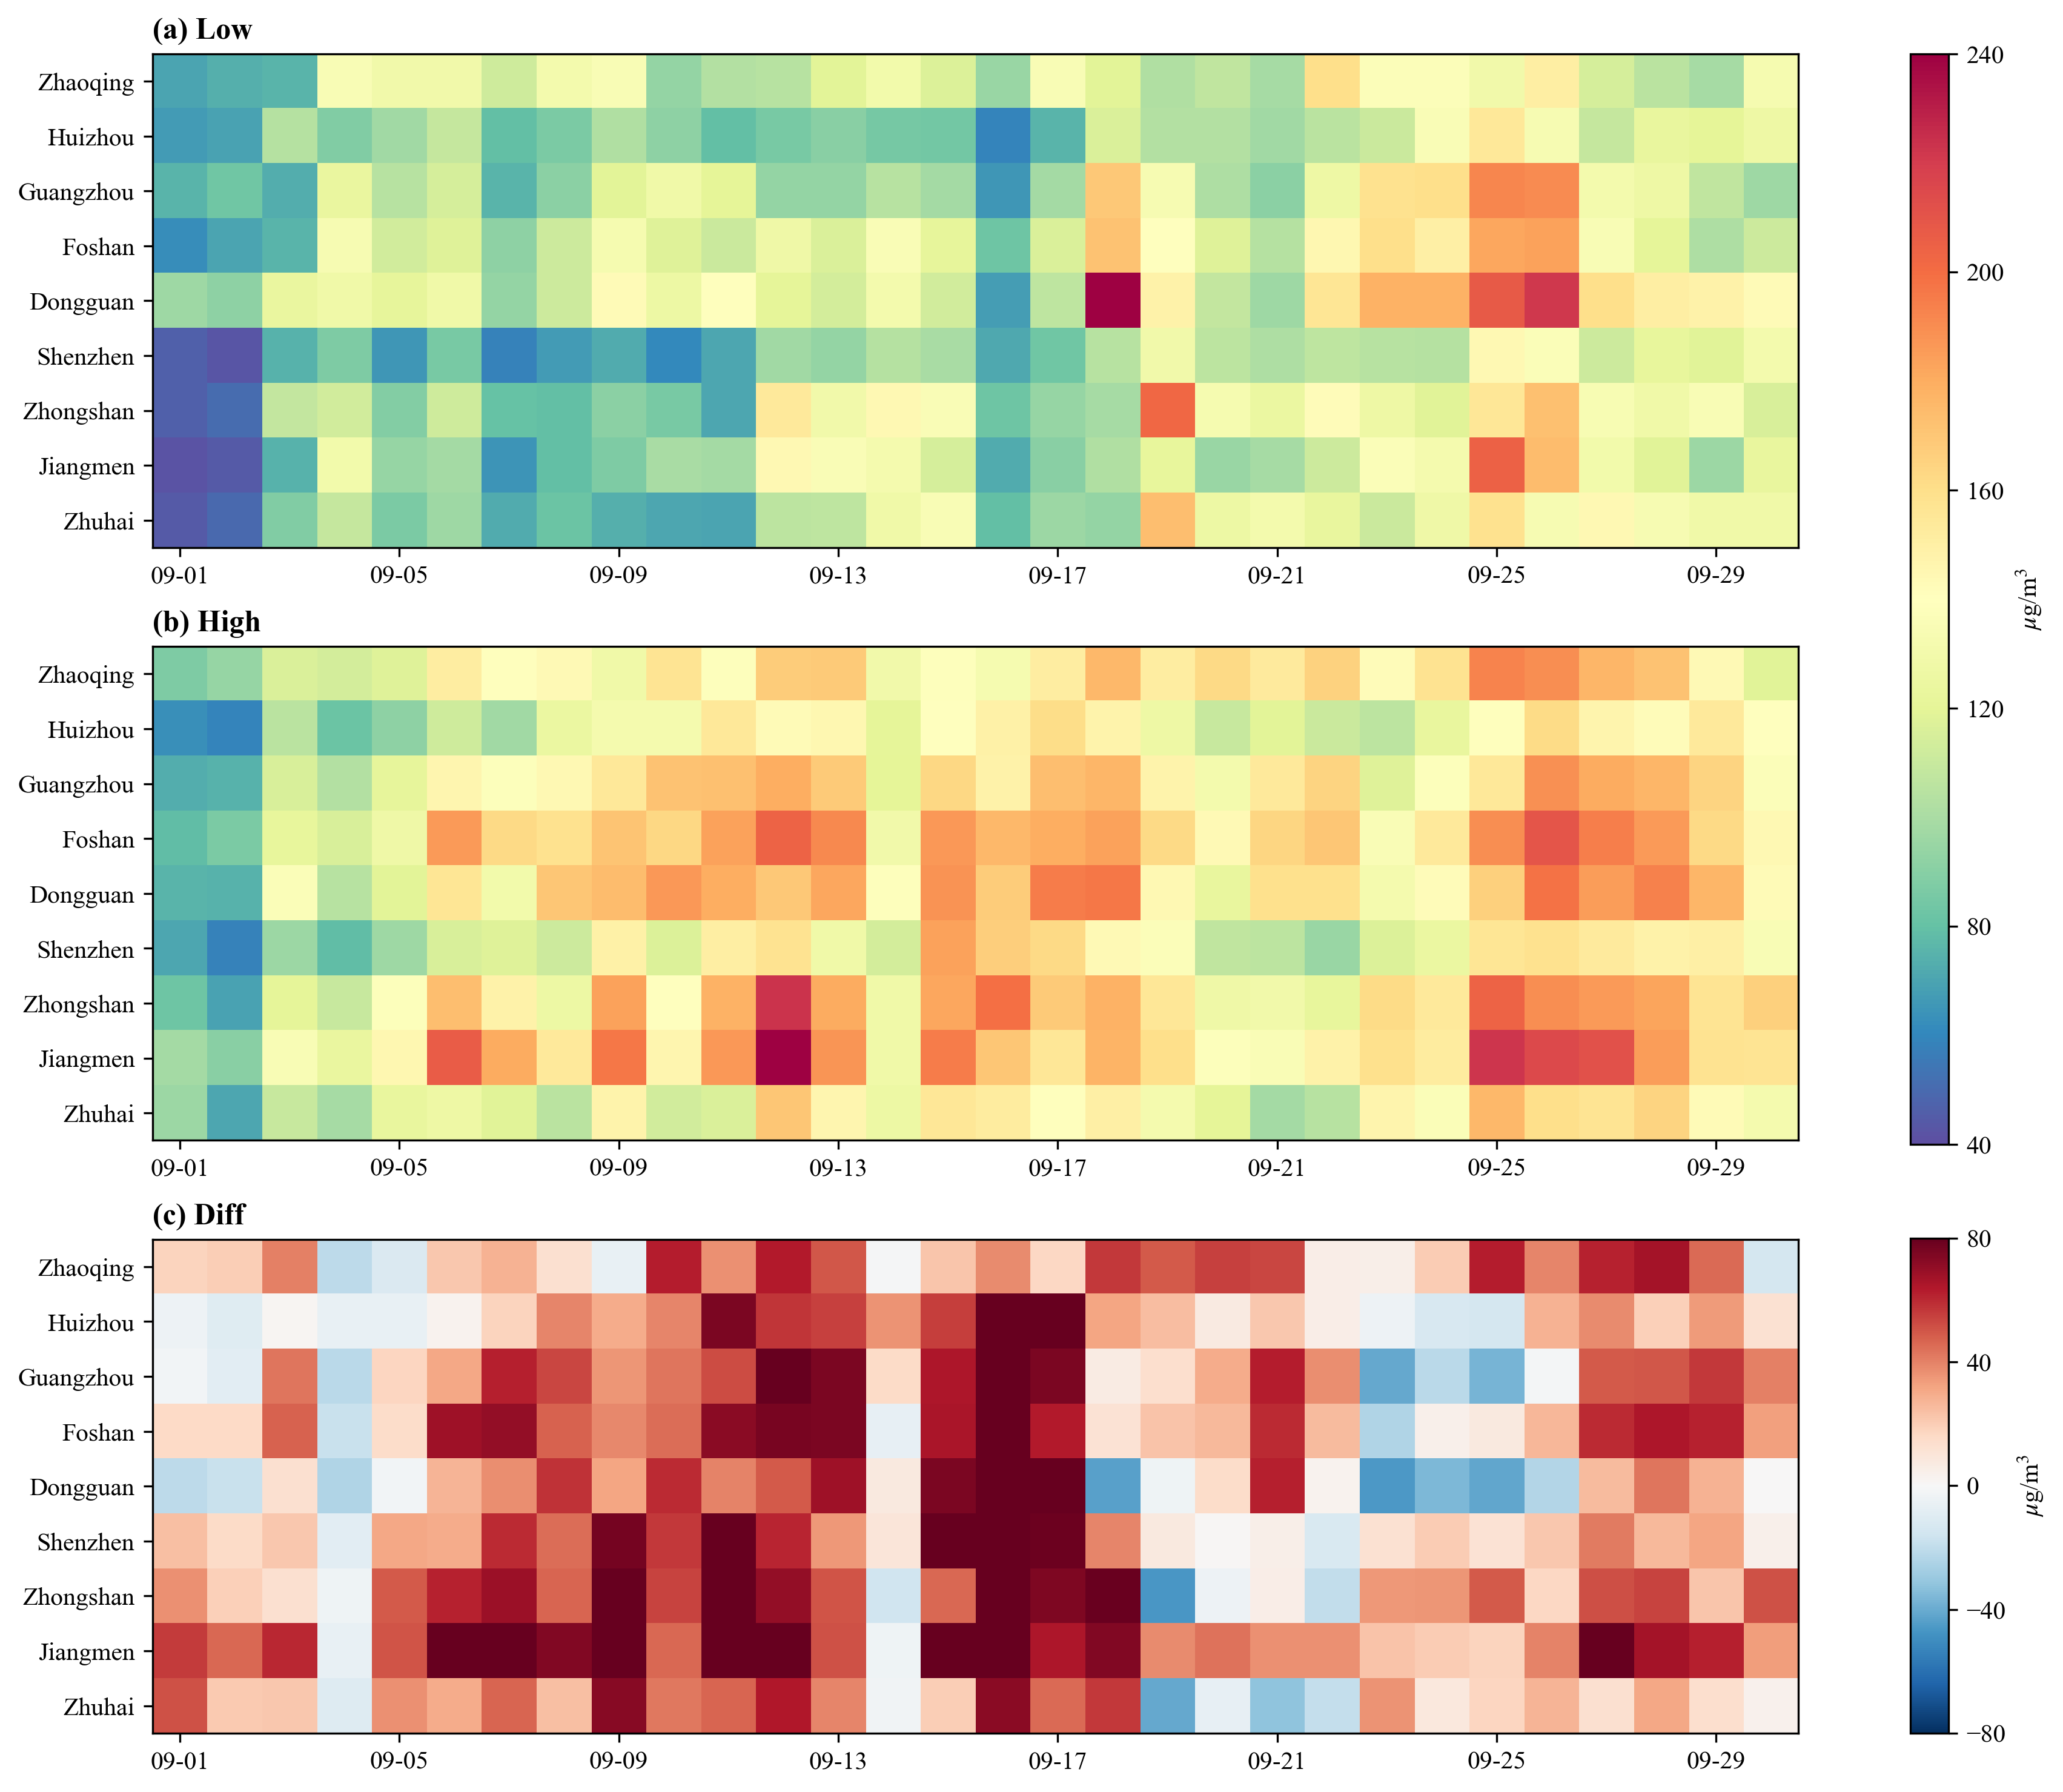

In [12]:
cmin = 40
cmax = 240
dmin = -80
dmax = 80

fig = plt.figure(figsize=(14, 12),dpi=300)
ax = fig.subplots(3,1)

ci = ax[0].imshow(thermal_low, vmin=cmin,vmax=cmax,cmap='Spectral_r')
ci = ax[1].imshow(thermal_high, vmin=cmin,vmax=cmax,cmap='Spectral_r')
cd = ax[2].imshow(thermal_high-thermal_low, vmin=dmin,vmax=dmax,cmap='RdBu_r')

ax[0].set_title('(a) Low', loc='left',fontdict={'fontsize':12,'fontweight':'bold'})
ax[1].set_title('(b) High', loc='left',fontdict={'fontsize':12,'fontweight':'bold'})
ax[2].set_title('(c) Diff', loc='left',fontdict={'fontsize':12,'fontweight':'bold'})

for i in range(3):
    ax[i].set_xticks(np.arange(0,np.size(thermal_high,1),4))
    ax[i].set_xticklabels(pd.date_range('2023-09-01', '2023-09-30', freq='4D').strftime('%m-%d'))
    ax[i].set_yticks(np.arange(len(city_list_EN)))
    ax[i].set_yticklabels(city_list_EN)

fig.subplots_adjust(right=0.9,hspace=0.2)

position1 = fig.add_axes([0.88, 0.38, 0.015, 0.5])
cbar1 = fig.colorbar(ci, cax=position1)
cbar1.set_ticks(np.arange(cmin,cmax+.1,40))
cbar1.set_label('$\mu$g/m$^3$')

position2 = fig.add_axes([0.88, 0.11, 0.015, 0.227])
cbar2 = fig.colorbar(cd, cax=position2)
cbar2.set_ticks(np.arange(dmin,dmax+.1,40))
cbar2.set_label('$\mu$g/m$^3$')

plt.show()
